In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('advertising.csv')

In [5]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [20]:
data.Timestamp = pd.to_datetime(data.Timestamp, format='%Y-%m-%d %H:%M:%S')
data['Month'] = data.Timestamp.dt.month
data['Day'] = data.Timestamp.dt.day
data['Hour'] = data.Timestamp.dt.hour

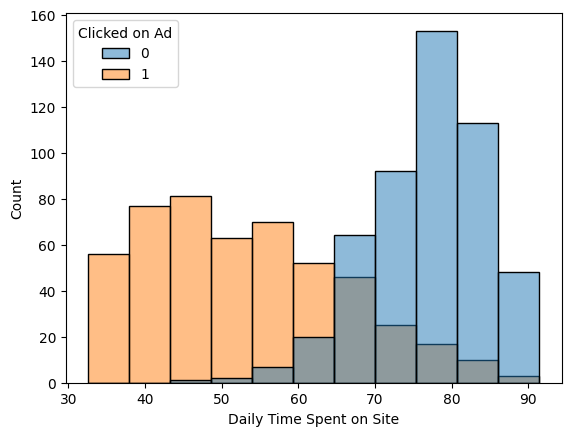

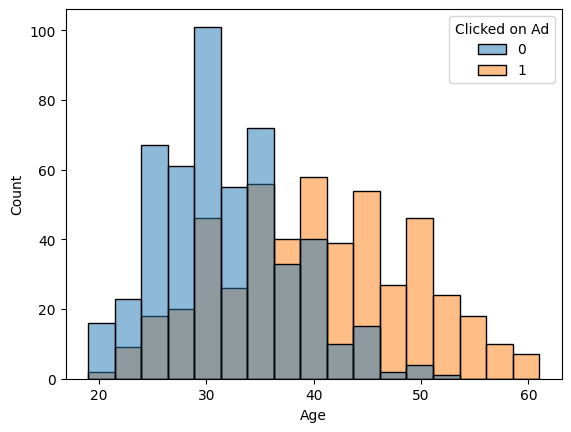

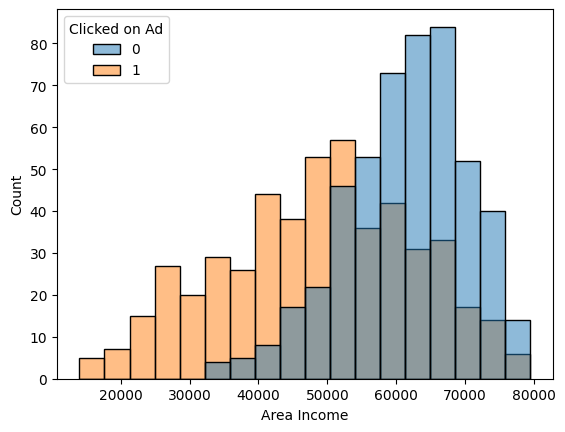

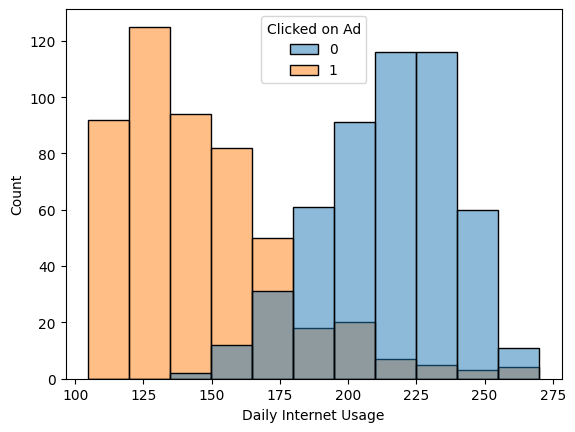

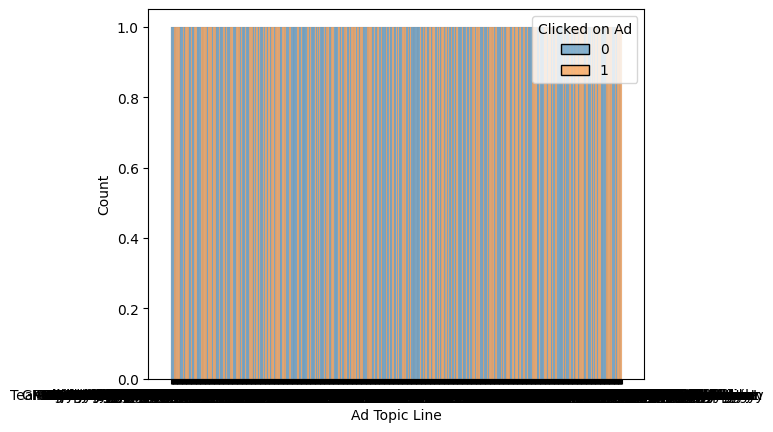

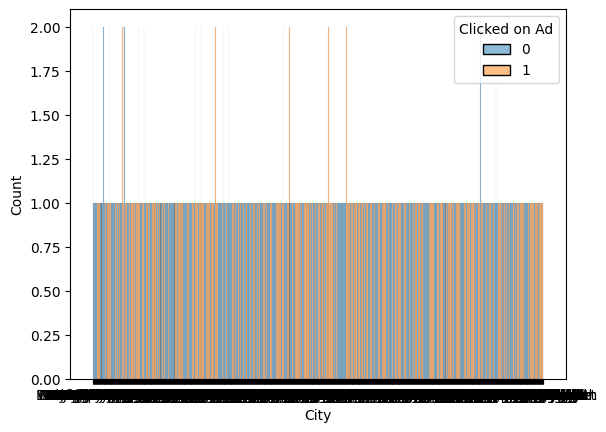

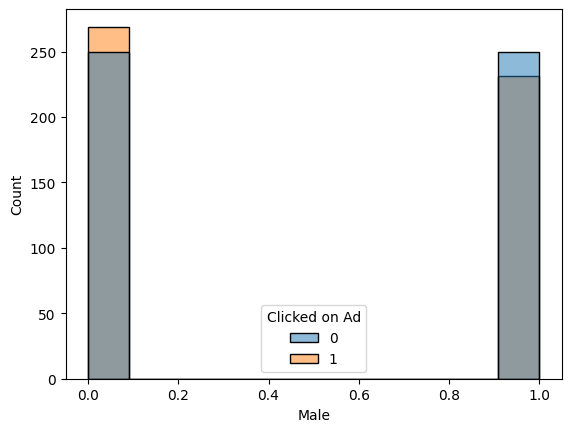

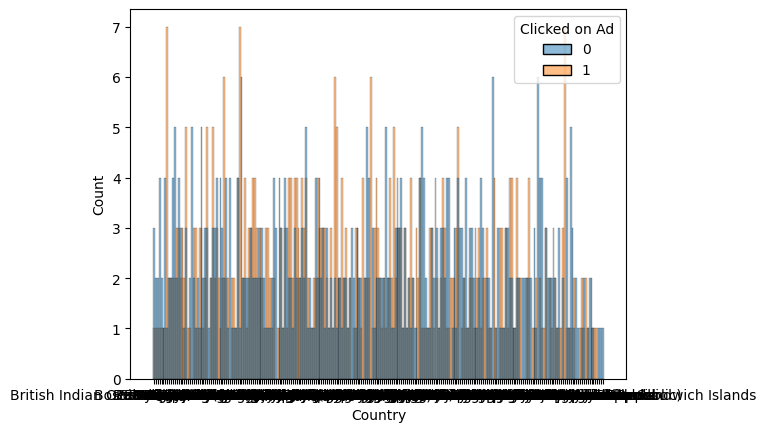

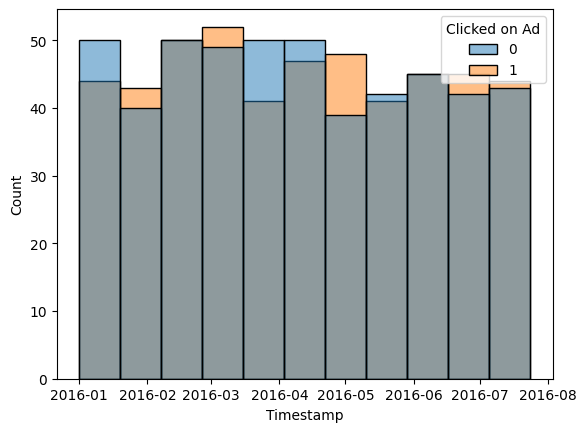

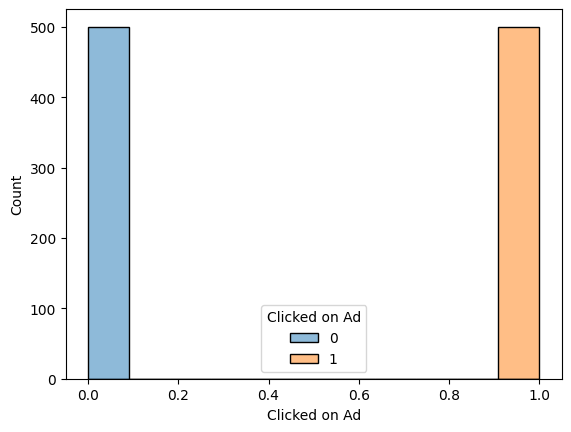

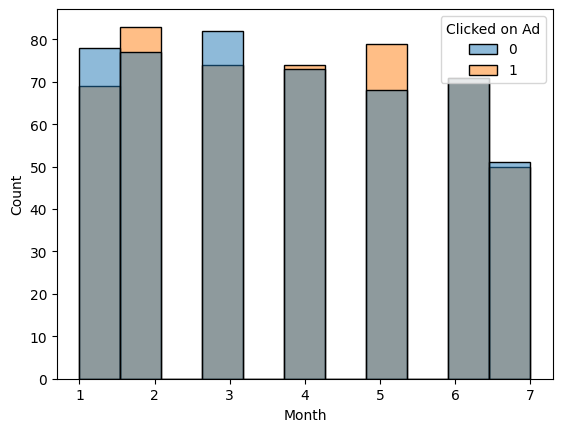

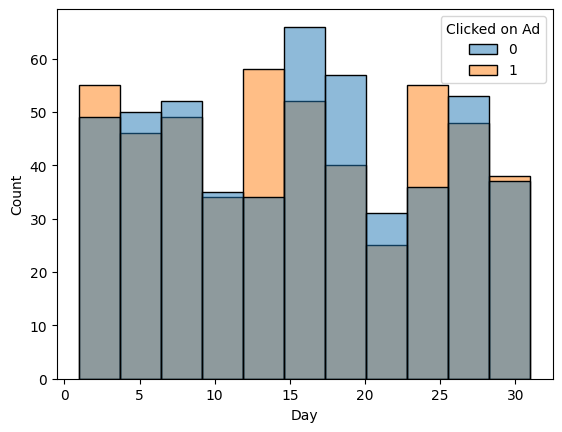

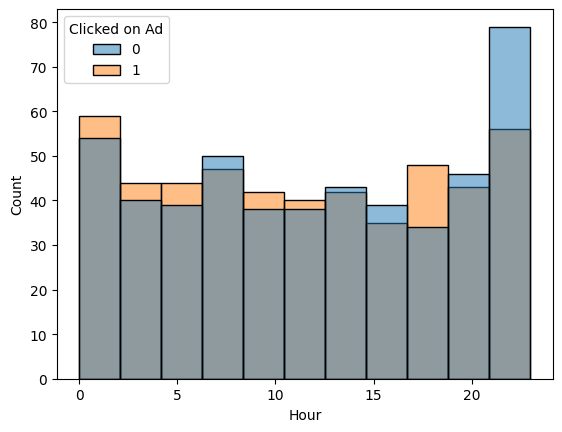

In [21]:
for i in data.columns:
    sns.histplot(data=data, x=i, hue='Clicked on Ad')
    plt.show()

In [22]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Month', 'Day', 'Hour'],
      dtype='object')

In [23]:
data = data.drop(['City', 'Country', 'Ad Topic Line'], axis=1)

In [24]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month,Day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,2016-04-10 10:34:06.636000256,0.50000,3.817000,15.484000,11.660000
min,32.600000,19.000000,13996.500000,104.780000,0.000000,2016-01-01 02:52:10,0.00000,1.000000,1.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,2016-02-18 02:55:42,0.00000,2.000000,8.000000,6.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,2016-04-07 17:27:29.500000,0.50000,4.000000,15.000000,12.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,2016-05-31 03:18:14,1.00000,5.000000,23.000000,18.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,2016-07-24 00:22:16,1.00000,7.000000,31.000000,23.000000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,NaN,0.50025,1.926973,8.734073,6.960952


<Axes: >

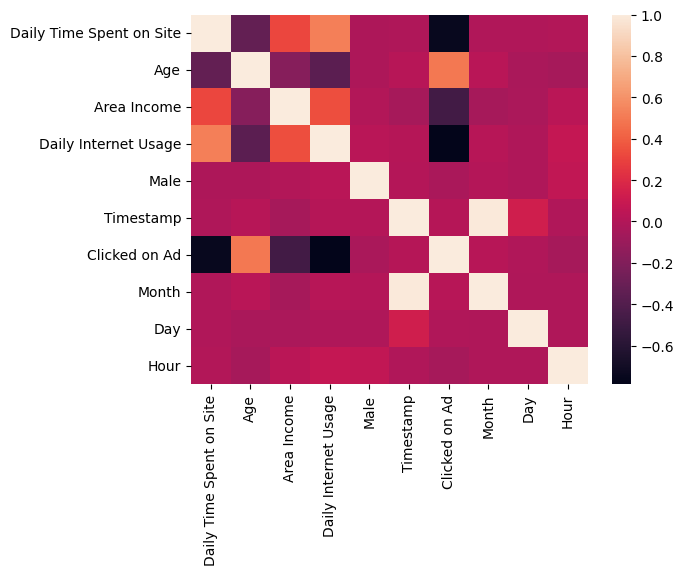

In [27]:
sns.heatmap(data.corr())

In [28]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month,Day,Hour
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.012338,-0.748117,-0.010920,-0.011217,0.000895
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.017475,0.492531,0.023689,-0.038162,-0.049905
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.053623,-0.476255,-0.050216,-0.026523,0.034573
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,0.015818,-0.786539,0.017530,-0.012531,0.074347
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,0.003215,-0.038027,0.005220,-0.013253,0.058552
Timestamp,-0.012338,0.017475,-0.053623,0.015818,0.003215,1.000000,0.015056,0.988980,0.130688,-0.011102
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,0.015056,1.000000,0.016095,-0.005269,-0.047431
Month,-0.010920,0.023689,-0.050216,0.017530,0.005220,0.988980,0.016095,1.000000,-0.017274,-0.013748
Day,-0.011217,-0.038162,-0.026523,-0.012531,-0.013253,0.130688,-0.005269,-0.017274,1.000000,-0.017064
Hour,0.000895,-0.049905,0.034573,0.074347,0.058552,-0.011102,-0.047431,-0.013748,-0.017064,1.000000


In [29]:
train = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Month']]
target = data['Clicked on Ad']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
train = scaler.fit_transform(train)

In [35]:
train

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -0.42419322],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538,  0.09501513],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -0.42419322],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388, -0.94340157],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -0.42419322],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 ,  1.13343183]])

In [36]:
from sklearn.model_selection import train_test_split

<Axes: xlabel='Clicked on Ad', ylabel='Count'>

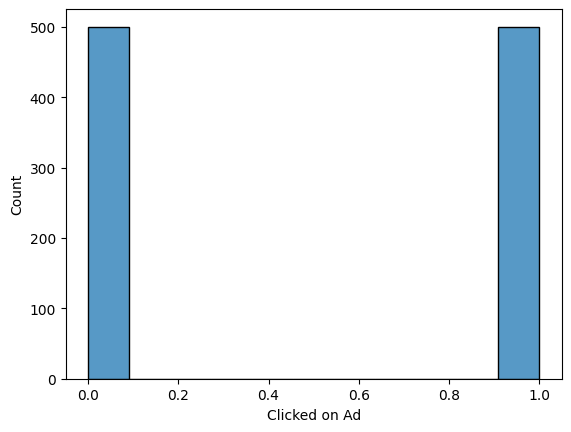

In [37]:
sns.histplot(target)

In [38]:
x_train, x_val, y_train, y_val = train_test_split(train, target, random_state=12, shuffle=True)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
LR = LogisticRegression().fit(x_train, y_train)
predict = LR.predict(x_val)
accuracy = accuracy_score(y_val, predict)
accuracy

0.968

In [50]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=12, max_depth=4).fit(x_train, y_train)
predict = DTC.predict(x_val)
accuracy = accuracy_score(y_val, predict)
accuracy

0.94

In [51]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=12, max_depth=4, n_estimators=500).fit(x_train, y_train)
predict = RFC.predict(x_val)
accuracy = accuracy_score(y_val, predict)
accuracy

0.96

In [59]:
import lightgbm as lgb
LGB = lgb.LGBMClassifier(learning_rate=0.3).fit(x_train, y_train)
predict = LGB.predict(x_val)
accuracy = accuracy_score(y_val, predict)
accuracy

0.952

In [61]:
import xgboost as xgb
XGB = xgb.XGBClassifier(learning_rate=0.3).fit(x_train, y_train)
predict = XGB.predict(x_val)
accuracy = accuracy_score(y_val, predict)
accuracy

0.948

In [74]:
result = pd.DataFrame({'LR_predict':LR.predict(train), \
                       'DTC_predict':DTC.predict(train), \
                       'RFC_predict':RFC.predict(train), \
                      'LGB_preidct':LGB.predict(train), \
                      'XGB_predict':XGB.predict(train),\
                     'Target':target})

In [75]:
result

,LR_predict,DTC_predict,RFC_predict,LGB_preidct,XGB_predict,Target
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
995,0,0,0,0,0,1
996,1,1,1,1,1,1
997,1,1,1,1,1,1
998,1,1,0,0,0,0


In [83]:
not_all = result[~((result.LR_predict==result.DTC_predict)&\
      (result.DTC_predict==result.RFC_predict)&\
      (result.RFC_predict==result.LGB_preidct)&\
      (result.LGB_preidct==result.XGB_predict)&\
      (result.XGB_predict==result.Target))]

In [88]:
not_all

,LR_predict,DTC_predict,RFC_predict,LGB_preidct,XGB_predict,Target
111,0,1,1,1,1,1
121,0,0,1,0,0,0
139,1,0,1,0,0,0
150,0,1,1,1,1,0
159,0,0,0,1,1,1
181,0,0,0,1,1,1
188,1,0,1,0,1,1
233,0,0,0,1,1,1
237,1,1,1,0,0,0
244,0,1,0,0,0,0


In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_val, RFC.predict(x_val)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.97      0.96      0.96       135

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [91]:
print(classification_report(y_val, DTC.predict(x_val)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       115
           1       0.97      0.92      0.94       135

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [92]:
print(classification_report(y_val, LGB.predict(x_val)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.98      0.93      0.95       135

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [93]:
print(classification_report(y_val, XGB.predict(x_val)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.94       115
           1       0.97      0.93      0.95       135

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [94]:
print(classification_report(y_val, LR.predict(x_val)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       115
           1       0.98      0.96      0.97       135

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

